## Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loaded my csv file using the pandas method "read_csv"

In [3]:
test = pd.read_csv('../data/titanic.csv')

# Displayed the first few roles with the method "head()"
test.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Missing Values

In [4]:
missing = test.isnull().sum().sum()
missing

414

#### There are about 414 missing values in total and can be found in the Age, fare and Cabin column.
#### The method for checking missing value in python is the "isnull()" method. Using the "sum()" method helps to combine all rows and give a total count for each column

### Handling Missing Data

In [5]:
Age = test['Age']
Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
332 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [6]:
age_missing_value = Age.isnull().sum()
age_missing_value

86

### The Age column contains in total 86 missing values  and the missing values were handled using dependent columns like Pclass and Sex of the passengers with missing age value to determine their age.
### The Embarked column does not have any missing value

In [7]:
test['Age'] = test.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [8]:
# Confirming if the Age missing value has been handled
missing = test.isnull().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Removing Duplicates 

#### I used the method "duplicated()" to check for duplicates in the data but i did not record any duplicates after getting the 
#### To remove duplicate if any was present, the "drop_duplicates" method would be used

In [9]:
# duplicates = test.duplicated().sum()
# duplicates

duplicate = test[test.duplicated()]
duplicate.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Data Types

#### To check the datatype for each columns in the dataset, i made use of the method "info()"
#### each column has the correct datatypes and there was no need to change the datatypes

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Data Exploration

#### I used different statistic methods from pandas such as mean(), median(), min(), max() to make basic calculation on numeric columns
#### I also used the "describe()" method which summarized all tge statics for me

In [11]:
statistics = pd.DataFrame({
    'Mean': test.mean(numeric_only=True),
    'Median': test.median(numeric_only=True),
    'Min': test.min(numeric_only=True),
    'Max': test.max(numeric_only=True),
})
statistics

,Mean,Median,Min,Max
PassengerId,1100.500000,1100.5000,892.00,1309.0000
Survived,0.363636,0.0000,0.00,1.0000
Pclass,2.265550,3.0000,1.00,3.0000
Age,29.297847,25.0000,0.17,76.0000
SibSp,0.447368,0.0000,0.00,8.0000
Parch,0.392344,0.0000,0.00,9.0000
Fare,35.627188,14.4542,0.00,512.3292


In [12]:
test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,29.297847,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.038856,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,25.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,36.375000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### For the grouping, i used the 'groupby()' method to group different columns with 'Survived' to draw some insights such as survivors by age, by class and so on

In [13]:
#Survival by class
survival_by_class = test.groupby(['Pclass'])['Survived'].mean()
survival_by_class

Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64

In [14]:
#Average age of passenger who survived
survivals = test[test['Survived'] == 1]
average_age_of_survivals = survivals['Age'].mean()
average_age_of_survivals

29.174934210526317

In [15]:
#Gender Distribution
gender_distribution = test['Sex'].value_counts()
gender_distribution

Sex
male      266
female    152
Name: count, dtype: int64

## Data Analysis

In [22]:
#Survival Rates by Age Groups: 
bin = [0, 12, 18, 35, 50, 65, 80]
label = ['0-12', '13-18', '19-35', '36-50', '51-65', '66-80']
test['grouped_age'] = pd.cut(test['Age'], bins=bin, labels=label, right=False)

Survival_rate_by_age_group = test.groupby('grouped_age', observed=False)['Survived'].mean() * 100
Survival_rate_by_age_group

grouped_age
0-12     43.478261
13-18    38.888889
19-35    34.496124
36-50    36.144578
51-65    44.117647
66-80    50.000000
Name: Survived, dtype: float64

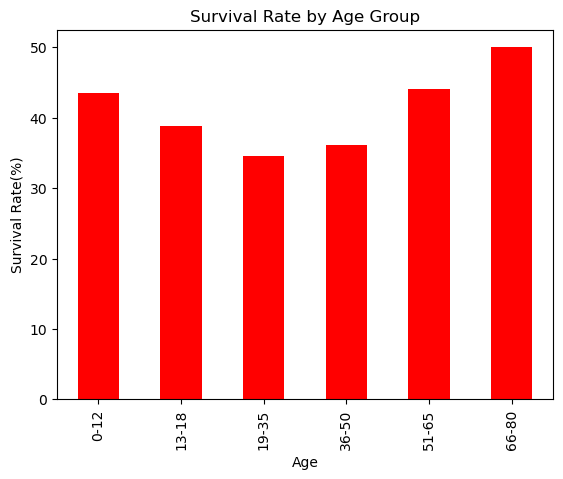

In [23]:
Survival_rate_by_age_group.plot(kind='bar', color='red')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age')
plt.ylabel('Survival Rate(%)')
plt.show()

In [24]:
Survival_rate_by_gender = test.groupby(['Sex'])['Survived'].mean() * 100
Survival_rate_by_gender

Sex
female    100.0
male        0.0
Name: Survived, dtype: float64

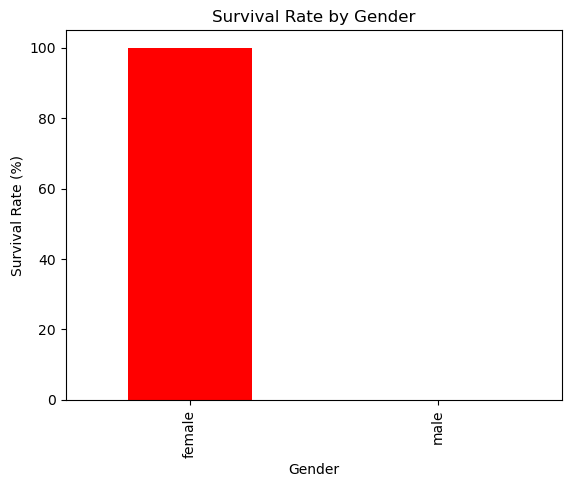

In [25]:
Survival_rate_by_gender.plot(kind='bar', color=['red', 'lightpink'])
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.show()

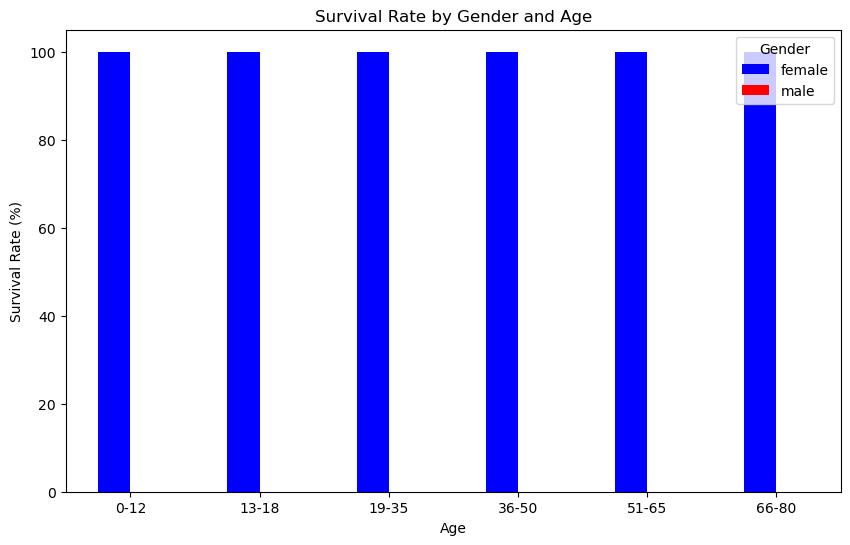

In [29]:
Survival_rate_by_gender_and_age_group = test.groupby(['grouped_age', 'Sex'], observed=False)['Survived'].mean().unstack() * 100
Survival_rate_by_gender_and_age_group.plot(kind='bar', figsize=(10, 6),color=['blue', 'red'])
plt.title('Survival Rate by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()